In [1]:
import numpy as np

In this file, we will set up a pipeline for
1. Collecting data for an experiment
2. Processing the data
3. Running a machine learrning algorithm.
4. Evaluating the algorithm
5. Choosing the best algorithm and hyperparameters

The main questions we need to answer are
1. How will data be collected?
2. How much data would we need?
3. What algorithm would be best? 
4. How would the amount of data influence algorithm selection?
5. How robust is our procedure to assumptions?

# Data collection

Here we want to call a simulator that collects data for us. The simulator can be arbitrary, but we would normally wish to have a specific API for calling it. In the simplest case, the only input parameter is the amount of data.

In [2]:
import data_generator

# Obtain data from the data generator. 
# In this case, the data generator gives us a random sample. Other sampling methodologies are possible, of course.
generator = data_generator.GaussianClassificationGenerator(2, np.array([0.3, 0.7]))

# Data processing

Here we perform preliminary processing of the data, if necessary. In particular, we may want to split the data in training, validation and test sets. Other standard pre-processing includes scaling the data, dealing with missing data, and removal of problematic data points. However, all of these could theoretically be dealt within the learning algorithm itself.

In [3]:
def process_data(X, Y):
    import sklearn.model_selection
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y)
    return X_train, X_test, y_train, y_test


# Evaluation

Here we run an ML algorithm, using the data for finding appropriate parameters. It is best to have a unified interface for doing this as well. 

In [4]:
# get a Trained model
def Train(clf, X_train, y_train):
    clf.fit(X_train, y_train) # Common API for classifiers in sklearn
    return clf

In [5]:
from sklearn.metrics import accuracy_score
def Evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test) # Common API
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [6]:
# The experiment setup

In [7]:
n_data = 200 # how much data would we have - this can vary to see how much data we need
n_experiments = 100 # More experiments give us higher faith in the result
n_evaluation_data = 10000 # this number should be relatively large to get good estimates

## Setup
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
models = [svm.SVC(gamma=0.01, C=100),
         LogisticRegression(random_state=0),
         MLPClassifier(random_state=1, max_iter=300)]
n_models = len(models)
score = np.zeros([n_models, n_experiments])
real_score = np.zeros([n_models, n_experiments])

[X_eval, y_eval] = generator.generate(n_evaluation_data) # data is generated here only to evaluate the pipeline

# The point of the experiment is to evaluate the models and select the best
for i in range(n_experiments):
    print ("Experiment ", i);
    print ("------------");
    # Every experiment tests the complete pipeline
    [X, Y] = generator.generate(n_data) # data is generated here
    [X_train, X_test, y_train, y_test] = process_data(X, Y) # processing also splits the data in two parts
    k = 0
   
    for model in models:
        Train(model, X_train, y_train)
        score[k,i] = Evaluate(model, X_test, y_test)
        real_score[k,i] = Evaluate(model, X_eval, y_eval)
        print(model, score[k,i], real_score[k,i])
        k+=1
        

Experiment  0
------------
SVC(C=100, gamma=0.01) 0.82 0.7732
LogisticRegression(random_state=0) 0.76 0.7345


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7951
Experiment  1
------------
SVC(C=100, gamma=0.01) 0.54 0.772
LogisticRegression(random_state=0) 0.52 0.7546


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7806
Experiment  2
------------
SVC(C=100, gamma=0.01) 0.68 0.7496
LogisticRegression(random_state=0) 0.7 0.7577


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7818
Experiment  3
------------
SVC(C=100, gamma=0.01) 0.78 0.7246
LogisticRegression(random_state=0) 0.72 0.7038
MLPClassifier(max_iter=300, random_state=1) 0.78 0.7848
Experiment  4
------------
SVC(C=100, gamma=0.01) 0.82 0.7778
LogisticRegression(random_state=0) 0.84 0.7444


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.7845
Experiment  5
------------
SVC(C=100, gamma=0.01) 0.8 0.7596
LogisticRegression(random_state=0) 0.78 0.7332


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.792
Experiment  6
------------
SVC(C=100, gamma=0.01) 0.68 0.7811
LogisticRegression(random_state=0) 0.68 0.7594


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.66 0.7909
Experiment  7
------------
SVC(C=100, gamma=0.01) 0.82 0.7873
LogisticRegression(random_state=0) 0.78 0.7651


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7768
Experiment  8
------------
SVC(C=100, gamma=0.01) 0.72 0.7632
LogisticRegression(random_state=0) 0.68 0.7692


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.68 0.7747
Experiment  9
------------
SVC(C=100, gamma=0.01) 0.78 0.7771
LogisticRegression(random_state=0) 0.74 0.7673


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7777
Experiment  10
------------
SVC(C=100, gamma=0.01) 0.84 0.7799
LogisticRegression(random_state=0) 0.8 0.7035


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7829
Experiment  11
------------
SVC(C=100, gamma=0.01) 0.8 0.7799
LogisticRegression(random_state=0) 0.76 0.7657


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7801
Experiment  12
------------
SVC(C=100, gamma=0.01) 0.78 0.7848
LogisticRegression(random_state=0) 0.74 0.761


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7887
Experiment  13
------------
SVC(C=100, gamma=0.01) 0.8 0.7825
LogisticRegression(random_state=0) 0.74 0.7592


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7815
Experiment  14
------------
SVC(C=100, gamma=0.01) 0.76 0.7665
LogisticRegression(random_state=0) 0.74 0.7262


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7886
Experiment  15
------------
SVC(C=100, gamma=0.01) 0.78 0.7597
LogisticRegression(random_state=0) 0.78 0.7061


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7825
Experiment  16
------------
SVC(C=100, gamma=0.01) 0.84 0.7807
LogisticRegression(random_state=0) 0.8 0.7588


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7903
Experiment  17
------------
SVC(C=100, gamma=0.01) 0.86 0.7705
LogisticRegression(random_state=0) 0.84 0.7325


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7867
Experiment  18
------------
SVC(C=100, gamma=0.01) 0.76 0.7589
LogisticRegression(random_state=0) 0.74 0.7484


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7844
Experiment  19
------------
SVC(C=100, gamma=0.01) 0.72 0.7763
LogisticRegression(random_state=0) 0.7 0.7694
MLPClassifier(max_iter=300, random_state=1) 0.72 0.7862
Experiment  20
------------
SVC(C=100, gamma=0.01) 0.68 0.773
LogisticRegression(random_state=0) 0.68 0.7626
MLPClassifier(max_iter=300, random_state=1) 0.76 0.7785
Experiment  21
------------
SVC(C=100, gamma=0.01) 0.84 0.778
LogisticRegression(random_state=0) 0.86 0.7457


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7861
Experiment  22
------------
SVC(C=100, gamma=0.01) 0.76 0.779
LogisticRegression(random_state=0) 0.74 0.7719


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7777
Experiment  23
------------
SVC(C=100, gamma=0.01) 0.82 0.7801
LogisticRegression(random_state=0) 0.82 0.7677


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7856
Experiment  24
------------
SVC(C=100, gamma=0.01) 0.74 0.7865
LogisticRegression(random_state=0) 0.76 0.7557


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.72 0.7896
Experiment  25
------------
SVC(C=100, gamma=0.01) 0.78 0.7816
LogisticRegression(random_state=0) 0.74 0.766


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7853
Experiment  26
------------
SVC(C=100, gamma=0.01) 0.72 0.7564
LogisticRegression(random_state=0) 0.74 0.7544


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.787
Experiment  27
------------
SVC(C=100, gamma=0.01) 0.78 0.7791
LogisticRegression(random_state=0) 0.76 0.7556


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7845
Experiment  28
------------
SVC(C=100, gamma=0.01) 0.72 0.7798
LogisticRegression(random_state=0) 0.7 0.7581


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.72 0.7842
Experiment  29
------------
SVC(C=100, gamma=0.01) 0.66 0.7744
LogisticRegression(random_state=0) 0.64 0.7721


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.66 0.7775
Experiment  30
------------
SVC(C=100, gamma=0.01) 0.72 0.7775
LogisticRegression(random_state=0) 0.74 0.7636


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7886
Experiment  31
------------
SVC(C=100, gamma=0.01) 0.82 0.78
LogisticRegression(random_state=0) 0.8 0.7255


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7909
Experiment  32
------------
SVC(C=100, gamma=0.01) 0.76 0.7823
LogisticRegression(random_state=0) 0.7 0.7706


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7849
Experiment  33
------------
SVC(C=100, gamma=0.01) 0.84 0.7869
LogisticRegression(random_state=0) 0.76 0.76


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7779
Experiment  34
------------
SVC(C=100, gamma=0.01) 0.8 0.7794
LogisticRegression(random_state=0) 0.8 0.7686


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.86 0.7871
Experiment  35
------------
SVC(C=100, gamma=0.01) 0.76 0.7783
LogisticRegression(random_state=0) 0.62 0.7063


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7638
Experiment  36
------------
SVC(C=100, gamma=0.01) 0.86 0.7768
LogisticRegression(random_state=0) 0.86 0.7662
MLPClassifier(max_iter=300, random_state=1) 0.88 0.7748
Experiment  37
------------
SVC(C=100, gamma=0.01) 0.74 0.7773
LogisticRegression(random_state=0) 0.74 0.7463


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7819
Experiment  38
------------
SVC(C=100, gamma=0.01) 0.74 0.7823
LogisticRegression(random_state=0) 0.68 0.7347


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7893
Experiment  39
------------
SVC(C=100, gamma=0.01) 0.68 0.767
LogisticRegression(random_state=0) 0.66 0.7315


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7906
Experiment  40
------------
SVC(C=100, gamma=0.01) 0.74 0.7851
LogisticRegression(random_state=0) 0.7 0.734


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.7 0.7928
Experiment  41
------------
SVC(C=100, gamma=0.01) 0.82 0.7776
LogisticRegression(random_state=0) 0.78 0.7681


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7771
Experiment  42
------------
SVC(C=100, gamma=0.01) 0.78 0.7417
LogisticRegression(random_state=0) 0.8 0.765


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7811
Experiment  43
------------
SVC(C=100, gamma=0.01) 0.76 0.7853
LogisticRegression(random_state=0) 0.78 0.7668


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7837
Experiment  44
------------
SVC(C=100, gamma=0.01) 0.76 0.7742
LogisticRegression(random_state=0) 0.72 0.7661
MLPClassifier(max_iter=300, random_state=1) 0.78 0.7912
Experiment  45
------------
SVC(C=100, gamma=0.01) 0.8 0.7784
LogisticRegression(random_state=0) 0.78 0.7483


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7853
Experiment  46
------------
SVC(C=100, gamma=0.01) 0.88 0.7829
LogisticRegression(random_state=0) 0.88 0.7654


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.7733
Experiment  47
------------
SVC(C=100, gamma=0.01) 0.76 0.7638
LogisticRegression(random_state=0) 0.66 0.7196


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7946
Experiment  48
------------
SVC(C=100, gamma=0.01) 0.66 0.7748
LogisticRegression(random_state=0) 0.62 0.7284


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7885
Experiment  49
------------
SVC(C=100, gamma=0.01) 0.76 0.7848
LogisticRegression(random_state=0) 0.66 0.7513


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7929
Experiment  50
------------
SVC(C=100, gamma=0.01) 0.86 0.773
LogisticRegression(random_state=0) 0.8 0.7591
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7773
Experiment  51
------------
SVC(C=100, gamma=0.01) 0.72 0.7843
LogisticRegression(random_state=0) 0.7 0.7591


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.68 0.787
Experiment  52
------------
SVC(C=100, gamma=0.01) 0.82 0.7871
LogisticRegression(random_state=0) 0.8 0.7725


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7864
Experiment  53
------------
SVC(C=100, gamma=0.01) 0.82 0.7662
LogisticRegression(random_state=0) 0.78 0.7588


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7866
Experiment  54
------------
SVC(C=100, gamma=0.01) 0.76 0.77
LogisticRegression(random_state=0) 0.76 0.7644


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7819
Experiment  55
------------
SVC(C=100, gamma=0.01) 0.84 0.7852
LogisticRegression(random_state=0) 0.8 0.7575
MLPClassifier(max_iter=300, random_state=1) 0.84 0.7905
Experiment  56
------------
SVC(C=100, gamma=0.01) 0.8 0.7563
LogisticRegression(random_state=0) 0.8 0.7548


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7802
Experiment  57
------------
SVC(C=100, gamma=0.01) 0.74 0.7798
LogisticRegression(random_state=0) 0.74 0.7653
MLPClassifier(max_iter=300, random_state=1) 0.74 0.7802
Experiment  58
------------
SVC(C=100, gamma=0.01) 0.86 0.7689
LogisticRegression(random_state=0) 0.82 0.7586


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.86 0.786
Experiment  59
------------
SVC(C=100, gamma=0.01) 0.74 0.7855
LogisticRegression(random_state=0) 0.7 0.7503


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7892
Experiment  60
------------
SVC(C=100, gamma=0.01) 0.76 0.7828
LogisticRegression(random_state=0) 0.72 0.7465


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7755
Experiment  61
------------
SVC(C=100, gamma=0.01) 0.84 0.7629
LogisticRegression(random_state=0) 0.72 0.7006


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7735
Experiment  62
------------
SVC(C=100, gamma=0.01) 0.7 0.7786
LogisticRegression(random_state=0) 0.68 0.7469


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7874
Experiment  63
------------
SVC(C=100, gamma=0.01) 0.76 0.7835
LogisticRegression(random_state=0) 0.74 0.7628


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7838
Experiment  64
------------
SVC(C=100, gamma=0.01) 0.62 0.7571
LogisticRegression(random_state=0) 0.56 0.7562


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7548
Experiment  65
------------
SVC(C=100, gamma=0.01) 0.8 0.783
LogisticRegression(random_state=0) 0.78 0.7509


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7768
Experiment  66
------------
SVC(C=100, gamma=0.01) 0.76 0.7763
LogisticRegression(random_state=0) 0.76 0.7517


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7892
Experiment  67
------------
SVC(C=100, gamma=0.01) 0.84 0.7745
LogisticRegression(random_state=0) 0.84 0.7683
MLPClassifier(max_iter=300, random_state=1) 0.86 0.7792
Experiment  68
------------
SVC(C=100, gamma=0.01) 0.86 0.7859
LogisticRegression(random_state=0) 0.82 0.7452


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7854
Experiment  69
------------
SVC(C=100, gamma=0.01) 0.82 0.7773
LogisticRegression(random_state=0) 0.8 0.7541


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7833
Experiment  70
------------
SVC(C=100, gamma=0.01) 0.88 0.7806
LogisticRegression(random_state=0) 0.88 0.7615


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.7908
Experiment  71
------------
SVC(C=100, gamma=0.01) 0.72 0.7694
LogisticRegression(random_state=0) 0.72 0.7708


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7726
Experiment  72
------------
SVC(C=100, gamma=0.01) 0.78 0.7875
LogisticRegression(random_state=0) 0.76 0.719


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7889
Experiment  73
------------
SVC(C=100, gamma=0.01) 0.72 0.7816
LogisticRegression(random_state=0) 0.68 0.7551


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7911
Experiment  74
------------
SVC(C=100, gamma=0.01) 0.86 0.7751
LogisticRegression(random_state=0) 0.82 0.7161


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7603
Experiment  75
------------
SVC(C=100, gamma=0.01) 0.78 0.7789
LogisticRegression(random_state=0) 0.78 0.744


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7702
Experiment  76
------------
SVC(C=100, gamma=0.01) 0.76 0.7843
LogisticRegression(random_state=0) 0.74 0.7676


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7837
Experiment  77
------------
SVC(C=100, gamma=0.01) 0.8 0.7485
LogisticRegression(random_state=0) 0.78 0.7623


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.86 0.7764
Experiment  78
------------
SVC(C=100, gamma=0.01) 0.86 0.7635
LogisticRegression(random_state=0) 0.82 0.7155


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.9 0.7876
Experiment  79
------------
SVC(C=100, gamma=0.01) 0.8 0.7561
LogisticRegression(random_state=0) 0.76 0.7221


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7856
Experiment  80
------------
SVC(C=100, gamma=0.01) 0.76 0.7809
LogisticRegression(random_state=0) 0.7 0.7198


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7827
Experiment  81
------------
SVC(C=100, gamma=0.01) 0.72 0.7762
LogisticRegression(random_state=0) 0.7 0.7535


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7918
Experiment  82
------------
SVC(C=100, gamma=0.01) 0.74 0.7689
LogisticRegression(random_state=0) 0.72 0.722


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7919
Experiment  83
------------
SVC(C=100, gamma=0.01) 0.68 0.781
LogisticRegression(random_state=0) 0.64 0.7697


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.7 0.7845
Experiment  84
------------
SVC(C=100, gamma=0.01) 0.76 0.7899
LogisticRegression(random_state=0) 0.74 0.7683


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.78 0.7816
Experiment  85
------------
SVC(C=100, gamma=0.01) 0.82 0.7578
LogisticRegression(random_state=0) 0.82 0.7197


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.789
Experiment  86
------------
SVC(C=100, gamma=0.01) 0.84 0.7576
LogisticRegression(random_state=0) 0.8 0.737


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7763
Experiment  87
------------
SVC(C=100, gamma=0.01) 0.78 0.7789
LogisticRegression(random_state=0) 0.8 0.7707


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7775
Experiment  88
------------
SVC(C=100, gamma=0.01) 0.86 0.7834
LogisticRegression(random_state=0) 0.78 0.7616


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7683
Experiment  89
------------
SVC(C=100, gamma=0.01) 0.68 0.7887
LogisticRegression(random_state=0) 0.64 0.7518


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7714
Experiment  90
------------
SVC(C=100, gamma=0.01) 0.72 0.7777
LogisticRegression(random_state=0) 0.78 0.7618


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7733
Experiment  91
------------
SVC(C=100, gamma=0.01) 0.78 0.7741
LogisticRegression(random_state=0) 0.64 0.7419


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7967
Experiment  92
------------
SVC(C=100, gamma=0.01) 0.84 0.7805
LogisticRegression(random_state=0) 0.76 0.7403


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7741
Experiment  93
------------
SVC(C=100, gamma=0.01) 0.7 0.7812
LogisticRegression(random_state=0) 0.72 0.7554


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.66 0.7919
Experiment  94
------------
SVC(C=100, gamma=0.01) 0.82 0.7631
LogisticRegression(random_state=0) 0.8 0.7677


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.7768
Experiment  95
------------
SVC(C=100, gamma=0.01) 0.8 0.7751
LogisticRegression(random_state=0) 0.78 0.755


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.82 0.7961
Experiment  96
------------
SVC(C=100, gamma=0.01) 0.8 0.7739
LogisticRegression(random_state=0) 0.8 0.7305


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.793
Experiment  97
------------
SVC(C=100, gamma=0.01) 0.66 0.7665
LogisticRegression(random_state=0) 0.52 0.6899


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.74 0.7617
Experiment  98
------------
SVC(C=100, gamma=0.01) 0.72 0.7837
LogisticRegression(random_state=0) 0.7 0.7623
MLPClassifier(max_iter=300, random_state=1) 0.72 0.7861
Experiment  99
------------
SVC(C=100, gamma=0.01) 0.82 0.787
LogisticRegression(random_state=0) 0.8 0.7677
MLPClassifier(max_iter=300, random_state=1) 0.82 0.7872


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
print("Average scores", np.mean(score,axis=1))
print("Actual scores", np.mean(real_score,axis=1))

# Here we can see what would happen if we selected methods according to their test score
selected_method = np.argmax(score, axis=0)
selected_score = [score[selected_method[t], t] for t in range(n_experiments)]
selected_real_score = [real_score[selected_method[t], t] for t in range(n_experiments)]
                  
print("Test scores of selected", np.mean(selected_score))
print("Actual score of selected", np.mean(selected_real_score))
      

Average scores [0.773  0.7452 0.7842]
Actual scores [0.774793 0.749803 0.783104]
Test scores of selected 0.7961999999999998
Actual score of selected 0.778139


# Actual Selected versus Measured Score

As we can see, the average score of every single method on the test set is lower than the average score of the selected method. This is because we selected methods that were by chance the best on a random  training set. 
For the same reason, the test score that we measure is (on average) higher than the actual score.


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Test score distribution')

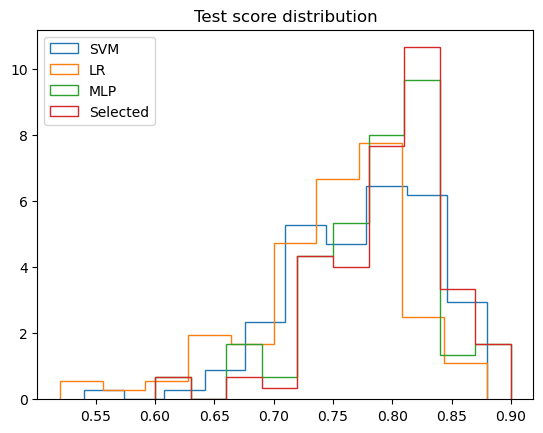

In [10]:
plt.hist(score[0], histtype="step", density=True)
plt.hist(score[1], histtype="step", density=True)
plt.hist(score[2], histtype="step", density=True)
plt.hist(selected_score, histtype="step", density=True)

plt.legend(["SVM", "LR", "MLP", "Selected"])
plt.title("Test score distribution")


Text(0.5, 1.0, 'Actual score distribution')

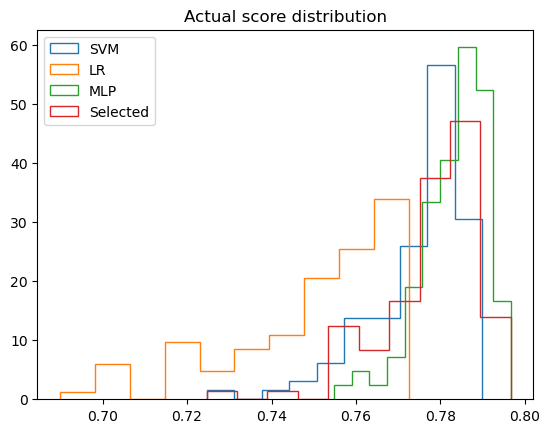

In [11]:
plt.hist(real_score[0], histtype="step", density=True)
plt.hist(real_score[1], histtype="step", density=True)
plt.hist(real_score[2], histtype="step", density=True)
plt.hist(selected_real_score, histtype="step", density=True)
plt.legend(["SVM", "LR", "MLP", "Selected"])

plt.title("Actual score distribution")


In [12]:
score[selected_method,:]

array([[0.84, 0.6 , 0.78, ..., 0.74, 0.72, 0.82],
       [0.84, 0.6 , 0.78, ..., 0.74, 0.72, 0.82],
       [0.84, 0.6 , 0.78, ..., 0.74, 0.72, 0.82],
       ...,
       [0.84, 0.6 , 0.78, ..., 0.74, 0.72, 0.82],
       [0.82, 0.54, 0.68, ..., 0.66, 0.72, 0.82],
       [0.82, 0.54, 0.68, ..., 0.66, 0.72, 0.82]])

In [13]:
selected_score

[0.84,
 0.6,
 0.78,
 0.78,
 0.88,
 0.82,
 0.68,
 0.82,
 0.72,
 0.84,
 0.84,
 0.84,
 0.82,
 0.84,
 0.78,
 0.78,
 0.84,
 0.86,
 0.76,
 0.72,
 0.76,
 0.86,
 0.76,
 0.82,
 0.76,
 0.84,
 0.82,
 0.82,
 0.72,
 0.66,
 0.74,
 0.82,
 0.78,
 0.84,
 0.86,
 0.78,
 0.88,
 0.76,
 0.76,
 0.74,
 0.74,
 0.82,
 0.8,
 0.82,
 0.78,
 0.84,
 0.88,
 0.78,
 0.74,
 0.76,
 0.86,
 0.72,
 0.84,
 0.84,
 0.76,
 0.84,
 0.8,
 0.74,
 0.86,
 0.76,
 0.78,
 0.84,
 0.82,
 0.78,
 0.62,
 0.8,
 0.76,
 0.86,
 0.86,
 0.82,
 0.88,
 0.78,
 0.8,
 0.74,
 0.86,
 0.82,
 0.76,
 0.86,
 0.9,
 0.8,
 0.8,
 0.78,
 0.8,
 0.7,
 0.78,
 0.82,
 0.84,
 0.8,
 0.86,
 0.76,
 0.8,
 0.84,
 0.84,
 0.72,
 0.84,
 0.82,
 0.8,
 0.74,
 0.72,
 0.82]